In [1]:
import pandas as pd
import seaborn as sns
from sklearn import model_selection

In [2]:
# Manipulate dataset

df = pd.read_csv("winequality-red.csv")

col_names = df.columns.str.split(";", expand=True)

x = list(col_names[0])
names = [str(o).strip('"') for o in x]

df_t = pd.DataFrame([range(12)])
df_t.columns = names

In [3]:
df.values

array([['7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5'],
       ['7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5'],
       ['7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5'],
       ...,
       ['6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.75;11;6'],
       ['5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71;10.2;5'],
       ['6;0.31;0.47;3.6;0.067;18;42;0.99549;3.39;0.66;11;6']],
      dtype=object)

In [4]:
for i in df.values:
    x = i.tolist()[0].split(";")
    new = list(map(float, x))
    df_t.loc[len(df_t)] = new
    
df_t.drop(0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [5]:
train_df = df_t.head(1000)
test_df = df_t.tail(599)

<h1>Cross Validation</h1>
(Standard and Stratified)

Text(0, 0.5, 'count')

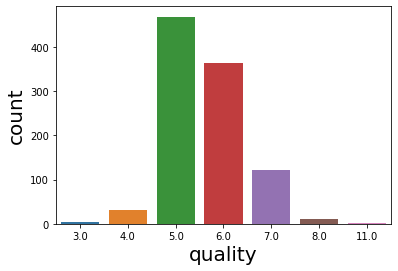

In [8]:
b = sns.countplot(x='quality', data=train_df)

b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [7]:
# Create new column in train set with k fold id
train_df["kfold"] = -1

# Randomize data points
train_df.sample(frac=1).reset_index(drop=True)

# Use model_selection module KFold with arbitrary split 5
kf = model_selection.KFold(n_splits=5)
# or use stratified k-fold if binary classification problem
# kf = model_selection.StratifiedKFold(n_splits=5)
# targets = train_df.targets.values

# Fill "kfold" column
for fold, (trn_, val_) in enumerate(kf.split(X=train_df)):
# for fold, (trn_, val_) in enumerate(kf.split(X=train_df, y=targets)):
    df.loc[val_, 'kfold'] = fold
    


C:\Users\imbrm\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<h2>Time-Series --> Hold-out based Cross Validation</h2>

<h2>Few Data Samples --> Leave-1-out Validation</h2>
(Quite time and computation-costly)

<h1>Stratified K-Fold for Regression</h1>

When n samples is big (>10k, 100k) number of bins doesn't matter.<br>
Otherwise, Sturge's Rule to calculate right number of bins.

N of Bins = 1 + log2(N)

In [9]:
import numpy as np

from sklearn import datasets

In [13]:
def create_folds(data):
    # new column for k-fold
    data["kfold"] = -1
    
    # shuffle data
    data.sample(frac=1).reset_index(drop=True)
    
    #calculate number of bins
    n_bins = int(np.round(1+np.log2(len(data))))
    
    # new column for bins and assign each row to a bin
    # pd.cut = "Bin values into discrete intervals."
    data.loc[:, "bins"] = pd.cut(data["target"], bins=n_bins, labels=False)
    
    # initiate kfold class
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill kfold column (bins instead of targets)
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
        
    # remove bins column (axis:0 = rows; axis:1 = columns)
    data = data.drop("bins", axis=1)
    
    return data

In [14]:
X, y = datasets.make_regression(n_samples=15000,
                               n_features=100,
                               n_targets=1)

df = pd.DataFrame(X, columns=[f"f_{i}" for i in range(X.shape[1])])
df.loc[:, "target"] = y
df = create_folds(df)

C:\Users\imbrm\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
